# Project Group - 21

Members: Naomi Cornelissen, Tom Bruinink, Sam Buisman, Bart van Heijningen, Klaas Molendijk

Student numbers: 5105765, 6075673, 5957915, 6088015, 6101399

# Research Objective


Background information:
Trains are generally seen as an environmental friendly mode of transport. The European Union recently announced a plan to improve the railway network in Europe in order to reduce CO2 emissions . The trend of investing in railway transport begs the question whether those investments are effective. Because there is often a great amount of money involved in those investments, this research takes a deeper dive into the relationship between investments in the rail network for passengers and the usage of that train network. The goal is to create a visual overview of that relationship. The infrastructure investments are measured relative to the gross domestic product (GDP) of a country. 
Research question:
What is the influence of a country’s investments in railway passenger transport relative to the GDP on train travel?
Datasets:
1.	Amount of passenger-kilometres per country (2000-2020)
https://data.oecd.org/transport/passenger-transport.htm#indicator-chart 
2.	GDP (per capita) per country (2000-2020) https://databank.worldbank.org/indicator/NY.GDP.PCAP.CD/1ff4a498/Popular-Indicators# https://ourworldindata.org/grapher/gdp-per-capita-maddison?tab=table
3.	Investments in railway passenger transport per country (2000-2020)
https://data.oecd.org/transport/infrastructure-investment.htm#indicator-chart


# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:

**Author 2**:

**Author 3**:

# Data Used

# Data Pipeline

# Research

In [11]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [ ]:
# Import data
prepare_passenger_data = pd.read_csv("passenger_data.csv")
prepare_infrastructure_data = pd.read_csv("InfrastructureInvestments_data.csv")
prepare_population_data = pd.read_csv("population_data.csv")
gdp_data = pd.read_csv("GDP_data.csv")
gdp_per_capita_data = pd.read_csv("GDP_per_capita_data.csv")

# Choose the timeframe you want to consider
start_timeframe = 2000
end_timeframe = 2020

In [12]:
# Prepare data

num_of_countries = gdp_data.shape[0]
num_of_columns = gdp_data.shape[1]

# Make new dataframes in same format as gdp_data and gdp_per_capita_data
passenger_data = pd.DataFrame(columns=gdp_data.columns)
infrastructure_data = pd.DataFrame(columns=gdp_data.columns)
population_data = pd.DataFrame(columns=gdp_data.columns)

# Initialize dataframe
for i in range(num_of_countries):
    passenger_data.loc[i] = ['..' for _ in range(num_of_columns)]
    infrastructure_data.loc[i] = ['..' for _ in range(num_of_columns)]
    population_data.loc[i] = ['..' for _ in range(num_of_columns)]

# Every row corresponds to data of a country
for i in range(num_of_countries):
    passenger_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]
    infrastructure_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]
    population_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]

# Fill dataframes with values if they exist
for country in gdp_data["Country"]:
    country_index = gdp_data.loc[gdp_data["Country"] == country].index[0]

    for year in gdp_data.columns[1:]:
        if ((prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))).any():
            if np.isnan(prepare_passenger_data["Value"].iloc[prepare_passenger_data.loc[(prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))].index[0]]) :
                continue
            else:
                passenger_data.loc[country_index,year] = prepare_passenger_data["Value"].iloc[prepare_passenger_data.loc[(prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))].index[0]]
                
        if ((prepare_infrastructure_data["LOCATION"] == country) & 
                                      (prepare_infrastructure_data["TIME"] == int(year))).any():
            if np.isnan(prepare_infrastructure_data["Value"].iloc[prepare_infrastructure_data.loc[(prepare_infrastructure_data["LOCATION"] == country) & 
                                      (prepare_infrastructure_data["TIME"] == int(year))].index[0]]):
                continue
            else:
                infrastructure_data.loc[country_index,year] = prepare_infrastructure_data["Value"].iloc[prepare_infrastructure_data.loc[(prepare_infrastructure_data["LOCATION"] == country) & 
                                        (prepare_infrastructure_data["TIME"] == int(year))].index[0]]
        
        if ((prepare_population_data["Code"] == country) & 
                                      (prepare_population_data["Year"] == int(year))).any():
            if np.isnan(prepare_population_data["Population"].iloc[prepare_population_data.loc[(prepare_population_data["Code"] == country) & 
                                      (prepare_population_data["Year"] == int(year))].index[0]]):
                continue
            else:
                population_data.loc[country_index,year] = prepare_population_data["Population"].iloc[prepare_population_data.loc[(prepare_population_data["Code"] == country) & 
                                        (prepare_population_data["Year"] == int(year))].index[0]]
                
print(population_data)

    Country      1995      1996      1997      1998      1999      2000  \
0       AFG  16418911  17106600  17788818  18493134  19262854  19542986   
1       ALB   3284370   3271336   3253721   3232185   3208265   3182027   
2       DZA  28478024  28984640  29476030  29924664  30346086  30774624   
3       ASM     53421     54523     55595     56626     57617     58251   
4       AND     62944     64166     64702     65204     65675     66116   
..      ...       ...       ...       ...       ...       ...       ...   
212     VIR    103468    104648    105801    106879    107842    108199   
213     PSE   2623149   2734003   2847222   2950926   3044490   3139950   
214     YEM  16103338  16614329  17108686  17608138  18114552  18628704   
215     ZMB   8684139   8902025   9133160   9372432   9621248   9891140   
216     ZWE  10994044  11178171  11362406  11548365  11716452  11834679   

         2001      2002      2003  ...      2011      2012      2013  \
0    19688634  21000258  22

In [13]:
# Create empty dataframe to check on what timeframe there is data per country
data_empty = {'Country': [], 'Timeframe passenger': [], 'Timeframe infrastructure': []}
country_timeframe = pd.DataFrame(data_empty)

# Determine timeframe per country for passenger and infrastructure data
for country in gdp_data["Country"]:
    country_index = gdp_data.loc[gdp_data["Country"] == country].index[0]

    passenger_start = 0
    passenger_stop = 0
    passenger_count = 0

    infrastructure_start = 0
    infrastructure_stop = 0
    infrastructure_count = 0
    
    for year in gdp_data.columns[1:]:
        if passenger_data.loc[country_index,year] != "..":
            if passenger_start == 0:
                passenger_start = int(year)
            passenger_stop = int(year)
            passenger_count += 1

        if infrastructure_data.loc[country_index,year] != "..":
            if infrastructure_start == 0:
                infrastructure_start = int(year)
            infrastructure_stop = int(year)
            infrastructure_count += 1

    # Continue if there is no data for a country or there is data missing in between
    if (passenger_stop - passenger_start + 1 != passenger_count or
        infrastructure_stop - infrastructure_start + 1 != infrastructure_count):
        continue

    else:
        new_row = {'Country': country, 'Timeframe passenger': "{}-{}".format(passenger_start,passenger_stop), 'Timeframe infrastructure': "{}-{}".format(infrastructure_start,infrastructure_stop)}
        country_timeframe = country_timeframe.append(new_row, ignore_index=True)

# Create empty list for countries that have data for entire timeframe
feasible_countries = []

for country in country_timeframe["Country"]:
    country_index = country_timeframe.loc[country_timeframe["Country"] == country].index[0]

    years_timeframe_passenger = country_timeframe["Timeframe passenger"].iloc[country_index].split('-')
    years_timeframe_infrastructure = country_timeframe["Timeframe infrastructure"].iloc[country_index].split('-')

    start_year_passenger = int(years_timeframe_passenger[0])
    end_year_passenger = int(years_timeframe_passenger[1])

    start_year_infrastructure = int(years_timeframe_infrastructure[0])
    end_year_infrastructure = int(years_timeframe_infrastructure[1])

    # Add countries to feasible_countries if data is available on entire timeframe for both passengers and infrastructure
    if (max(start_year_passenger,start_year_infrastructure) <= start_timeframe) & (min(end_year_passenger,end_year_infrastructure) >= end_timeframe):
        feasible_countries.append(country)

# Drop all years from dataframe that are not in timeframe
for year in gdp_data.columns[1:]:
    if int(year) < start_timeframe or int(year) > end_timeframe:
        gdp_data = gdp_data.drop(year, axis=1)
        gdp_per_capita_data = gdp_per_capita_data.drop(year, axis=1)
        passenger_data = passenger_data.drop(year, axis=1)
        infrastructure_data = infrastructure_data.drop(year, axis=1)

# Drop all countries from dataframe that are not in feasible countries
gdp_data = gdp_data[gdp_data['Country'].isin(feasible_countries)]
gdp_per_capita_data = gdp_per_capita_data[gdp_per_capita_data['Country'].isin(feasible_countries)]
passenger_data = passenger_data[passenger_data['Country'].isin(feasible_countries)]
infrastructure_data = infrastructure_data[infrastructure_data['Country'].isin(feasible_countries)]

In [14]:
# Set countries as index to make plotting easier
gdp_data.set_index('Country', inplace=True)
gdp_data = gdp_data.applymap(lambda x: '{:.0f}'.format(float(x)))  # Convert large numbers (e-powers) to normal numbers
gdp_per_capita_data.set_index('Country', inplace=True)
passenger_data.set_index('Country', inplace=True)
infrastructure_data.set_index('Country', inplace=True)

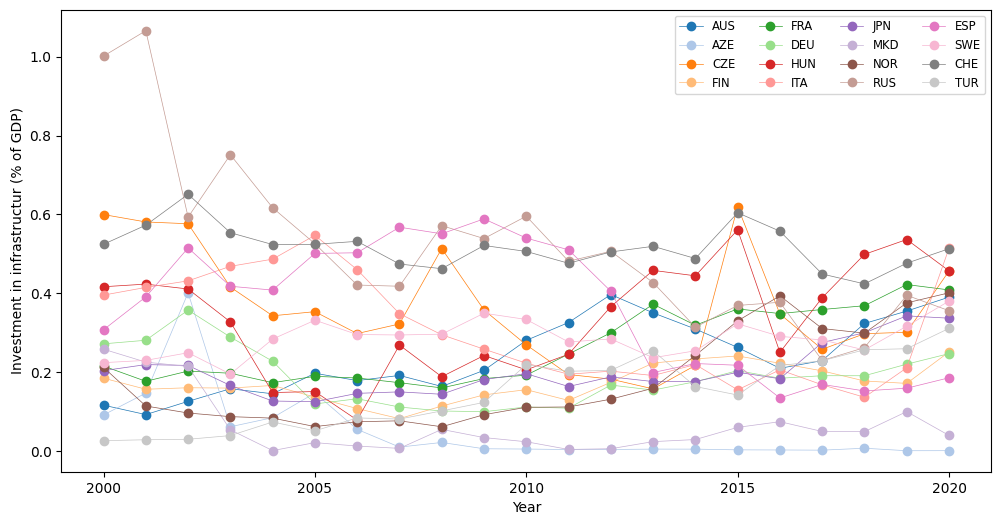

In [24]:
infrastructure_data = infrastructure_data.astype(float)
gdp_data = gdp_data.astype(float)

# Determine percentage of GDP that is invested in railway infrastructure
infrastructure_gdp = infrastructure_data / gdp_data * 100

# Create figure
plt.figure(figsize=(12, 6))

# Plot every country
for i, (index, row) in enumerate(infrastructure_gdp.iterrows()):
    plt.plot(row.index, row.values, marker='o', label=f'{index}', linewidth=0.5, color=plt.cm.tab20(i))

# Adjust years on x-axis for visibility
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('Investment in infrastructur (% of GDP)')

plt.legend(loc='upper right', fontsize='small', ncol = 4)
plt.show()